[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/casangi/astrohack/blob/main/docs/visualization_tutorial.ipynb)

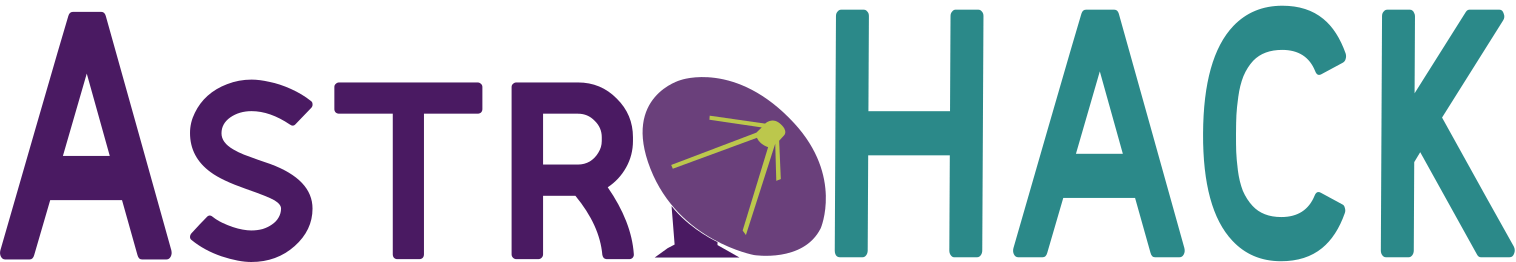

# Visualization Tutorial

This visualization tutorial uses the same dataset that is used on the VLA tutorial.
If the VLA tutorial has been previously run on the same directory the data will be re-utilized.

In [2]:
import os
from importlib.metadata import version

try:
    import astrohack
    
    print('AstroHACK version', version('astrohack'), 'already installed.')
except ImportError as e:
    print(e)
    print('Installing AstroHACK')
    
    os.system("pip install astrohack")
    
    import astrohack 
    print('astrohack version', version('astrohack'), ' installed.')

AstroHACK version 0.1.8 already installed.


In [3]:
# Convenience function:
import glob
def list_directory_files(path):
    try:
        for entry in glob.glob(path):
            print(entry)
    except FileNotFoundError:
        print(f'{path} not found.')

## Download Tutorial Data and spawning an Astrohack Client

If the VLA data cannot be found in the specified directory it will be downloaded.
The Astrohack client is spawned so that parallel processing is possible further down.

In [4]:
from astrohack import gdown_utils
from astrohack.astrohack_client import astrohack_local_client

ms_name = 'data/ea25_cal_small_after_fixed.split.ms'

gdown_utils.download('ea25_cal_small_before_fixed.split.ms', folder='data', unpack=True)

client = astrohack_local_client(cores=2, memory_limit='8GB')

2023-07-21 13:51:04,600 - INFO     - astrohack - (_check_parms.py:135) - [_check_logger_parms]: Setting default log_to_term to True.
2023-07-21 13:51:04,600 - INFO     - astrohack - (_check_parms.py:135) - [_check_logger_parms]: Setting default log_to_file to False.
2023-07-21 13:51:04,600 - INFO     - astrohack - (_check_parms.py:135) - [_check_logger_parms]: Setting default log_file to hack_.
2023-07-21 13:51:04,601 - INFO     - astrohack - (_check_parms.py:135) - [_check_logger_parms]: Setting default log_level to INFO.
2023-07-21 13:51:04,601 - INFO     - astrohack - (_check_parms.py:135) - [_check_worker_logger_parms]: Setting default log_to_term to False.
2023-07-21 13:51:04,601 - INFO     - astrohack - (_check_parms.py:135) - [_check_worker_logger_parms]: Setting default log_to_file to False.
2023-07-21 13:51:04,601 - INFO     - astrohack - (_check_parms.py:135) - [_check_worker_logger_parms]: Setting default log_file to hack_.
2023-07-21 13:51:04,602 - INFO     - astrohack - (_

/users/jhoskins/fornax/miniconda3/envs/holo/lib/python3.8/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41723 instead
  warnings.warn(


2023-07-21 13:51:06,497 - INFO     - astrohack - (astrohack_client.py:118) - Created client <Client: 'tcp://127.0.0.1:35559' processes=2 threads=2, memory=14.90 GiB>


## Extract_holog: checking data calibration

Astrohack requires the measurement set (MS) that is fed into `extract_holog` to be properly calibrated in CASA.
To check that calibration is sound, a method has been implemented in the `holog_mds` class that plots the visibilities at the center of the beam.

### Run extract_holog or open a holog file

Prior to plotting the diagnostic plots it is necessary to create a `holog_mds` object (holography Multi DataSet). This Object can be created by running `extract_holog`, or by opening the data products of `extract_holog` with the function `open_holog`.
Here `extract_holog` is executed if a previously produced `.holog.zarr` file is not found.

In [5]:
import os

from astrohack import extract_holog
from astrohack import extract_pointing

from astrohack.dio import open_holog

extract_pointing(
      ms_name='data/ea25_cal_small_after_fixed.split.ms',
      point_name='data/ea25_cal_small_after_fixed.split.point.zarr',
      parallel=True,
      overwrite=True
)

holog_file = 'data/ea25_cal_small_after_fixed.split.holog.zarr'

if os.path.exists(holog_file):
    holog_mds = open_holog(holog_file)
else:
    holog_mds = extract_holog(
        ms_name=ms_name, 
        data_column='CORRECTED_DATA', 
        parallel=True,
        overwrite=True
    )

2023-07-21 13:51:06,559 - WARNING  - astrohack - (_dio.py:42) - [extract_pointing]: data/ea25_cal_small_after_fixed.split.point.zarr will be overwritten.
Successful readonly open of usernoread-locked table data/ea25_cal_small_after_fixed.split.ms/ANTENNA: 8 columns, 3 rows
2023-07-21 13:51:09,785 - INFO     - astrohack - (extract_pointing.py:102) - [extract_pointing]: Finished processing


### Generate holography dictionary

The function `extract_holog` creates a fully formed observation dictionary by default but can also take a user specified observation dictionary via the input parameter, `holog_obs_dict`. To help with this the user function `generate_holo_obs_dict` is provided to generate and return the full dictionary to the user for subselection and modification.

In [6]:
from astrohack.extract_holog import generate_holog_obs_dict

holog_obs_dict = generate_holog_obs_dict(
    ms_name='data/ea25_cal_small_after_fixed.split.ms',
    point_name='data/ea25_cal_small_after_fixed.split.point.zarr',
    data_column="CORRECTED_DATA",
    parallel=False,
    overwrite=True,
)

2023-07-21 13:51:09,864 - WARNING  - astrohack - (_dio.py:42) - [extract_pointing]: data/ea25_cal_small_after_fixed.split.point.zarr will be overwritten.
Successful readonly open of usernoread-locked table data/ea25_cal_small_after_fixed.split.ms/ANTENNA: 8 columns, 3 rows
2023-07-21 13:51:10,114 - INFO     - astrohack - (_extract_point.py:256) - Writing pointing xds to data/ea25_cal_small_after_fixed.split.point.zarr/ant_ea04
2023-07-21 13:51:10,360 - INFO     - astrohack - (_extract_point.py:256) - Writing pointing xds to data/ea25_cal_small_after_fixed.split.point.zarr/ant_ea06
2023-07-21 13:51:10,603 - INFO     - astrohack - (_extract_point.py:256) - Writing pointing xds to data/ea25_cal_small_after_fixed.split.point.zarr/ant_ea25
2023-07-21 13:51:10,643 - INFO     - astrohack - (extract_pointing.py:102) - [extract_pointing]: Finished processing


### Inspect holography dictionary

Generally the printing a nested dictionary such as the `holog_obs_dict` is a messy, ugly affair and for this reason an additional convenience ffunction has been added to inspect the output dictionary, `inspect_holog_ocs_dict`. 

This function has two modes:

**static mode** - Static mode is a formatted string output and allows the user to define how the antenna dictionary list is handled. By adjusting the columns input variable the user can for instance take an scan list of length of 15 and display it as 3 rows of 5 columns (this would be columns=5). The reshaping code will look at the list and reshape it even if the length is not an exact split, ie. length =17 with columns=5 would give 4 rows as output with the last row being the remainders.

**dynamic mode** - Dynamic mode returns a collapsible json dictionary in the cell so that the user can look at only certain parts of large holog dictionaries.

The function accepts both `json` objects and json files as input.

In [7]:
from astrohack.dio import inspect_holog_obs_dict

inspect_holog_obs_dict(file=holog_obs_dict, style='static', columns=8)

ddi_0:{
   map_0:{
       scans:{
              [
                  8,   9,  10,  12,  13,  14,  16,  17
                 18,  23,  24,  25,  27,  28,  29,  31
                 32,  33,  38,  39,  40,  42,  43,  44
                 46,  47,  48,  53,  54,  55,  57
              ]
         }
         ant:{
            ea25:{
                  [
                   ea04

                  ]
             }
            ea06:{
                  [
                   ea04

                  ]
             }
         }
     }
 }
ddi_1:{
   map_0:{
       scans:{
              [
                  8,   9,  10,  12,  13,  14,  16,  17
                 18,  23,  24,  25,  27,  28,  29,  31
                 32,  33,  38,  39,  40,  42,  43,  44
                 46,  47,  48,  53,  54,  55,  57
              ]
         }
         ant:{
            ea25:{
                  [
                   ea04

                  ]
             }
            ea06:{
                  [
                   ea04

    

In [8]:
inspect_holog_obs_dict(file=holog_obs_dict, style='dynamic', columns=8)

<IPython.core.display.JSON object>

Now that we have a `holog_mds` object we define a variable `holog_exports` with the name of the directory to contain our diagnostic plots. We can also inspect our `holog_mds` object by calling its `summary` method. This method lists the attributes of the `holog_mds`, such as the input `MS` and the inputs given by the user, but more important for us going forward, it also gives us a summary of the data contents in the `holog_mds` and its available methods, here we are going to use the `plot_diagnostics` method.

In [9]:
holog_exports = 'holog_exports'
holog_mds.summary()

####################################################################################################
###                                         Summary for:                                         ###
###                       data/ea25_cal_small_after_fixed.split.holog.zarr                       ###
####################################################################################################

Attributes:
+--------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Calibration diagnostic plots

Below is a call to `plot_diagnostics`, we limit our plotting to only DDI 0 of antenna ea25 for simplicity. The plot shown here displays the Amplitudes and phases for RR and LL correlations at the beam center for all channels. With this plots we want to make sure that the Amplitudes remain close to 1, and that the phase remains close to 0. The data displayed here is well calibrated but displays the Gibbs phenomenon at the band edges which is normal.

2023-07-21 13:51:10,715 - INFO     - astrohack - (_check_parms.py:135) - [plot_diagnostics]: Setting default map to all.
2023-07-21 13:51:10,716 - WARNING  - astrohack - (_dio.py:236) - [plot_diagnostics]: Destination folder already exists, results may be overwritten


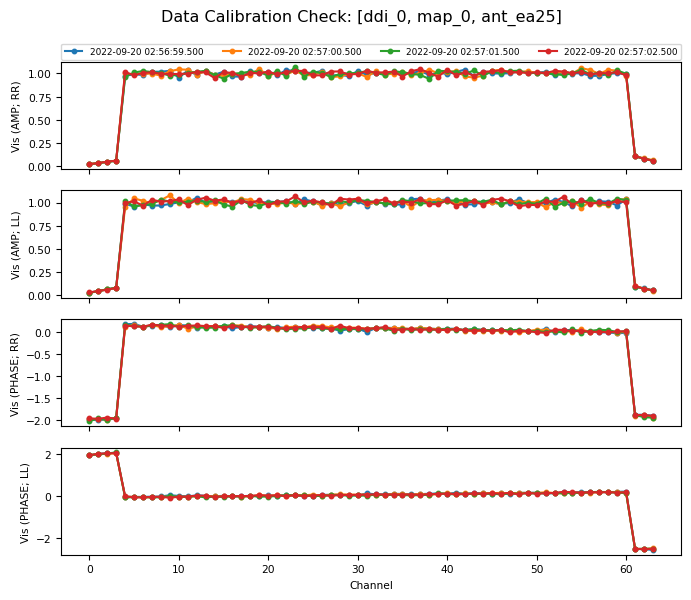

In [10]:
holog_mds.plot_diagnostics(holog_exports,         # Directory to contain the plots
                           ant_id='ea25',         # Plotting antenna ea25
                           ddi=0,                 # Plotting DDI 0
                           map_id=None,           # Plotting all mappings
                           complex_split='polar', # Split complex data to polar (amplitude + phase)
                           display=True,          # Display results in Notebook cell
                           parallel=False)        # Don't plots in parallel

Below we call `plot_diagnostics` again but this time over all the antennas and DDIs in the `holog_mds`. As before the created plots are stored in `holog_exports` but this time they are not displayed for brevity. All the files created by `plot_diagnostics` can be seen just after its execution.

In [11]:
holog_mds.plot_diagnostics(holog_exports,             # Directory to contain the plots
                           ant_id=None,               # Plotting all antennae
                           ddi=None,                  # Plotting all DDIs
                           map_id=None,               # Plotting all mappings
                           complex_split='cartesian', # Split comples data to cartesian (real + imaginary)
                           display=False,             # don't display results in Notebook cell
                           parallel=True)             # Do plots in parallel
# All exported files
print()
print('Created files:')
list_directory_files(holog_exports+'/holog*.png')

2023-07-21 13:51:12,256 - INFO     - astrohack - (_check_parms.py:135) - [plot_diagnostics]: Setting default ant to all.
2023-07-21 13:51:12,257 - INFO     - astrohack - (_check_parms.py:135) - [plot_diagnostics]: Setting default ddi to all.
2023-07-21 13:51:12,258 - INFO     - astrohack - (_check_parms.py:135) - [plot_diagnostics]: Setting default map to all.
2023-07-21 13:51:12,258 - WARNING  - astrohack - (_dio.py:236) - [plot_diagnostics]: Destination folder already exists, results may be overwritten

Created files:
holog_exports/holog_diagnostics_map_0_ant_ea25_ddi_0.png
holog_exports/holog_diagnostics_map_0_ant_ea06_ddi_0.png
holog_exports/holog_diagnostics_map_0_ant_ea25_ddi_1.png
holog_exports/holog_diagnostics_map_0_ant_ea06_ddi_1.png


## Holog: Checking beam and aperture quality and exporting data to FITS files

After we are sure about the quality of the calibrated data in the `MS` we want to make sure that the beam is well sampled and behaved and that the apertures are well characterised and have enough resolution. For that we are going to use the methods of the `image_mds` object, i.e. the data product of the `holog` function.

### Run holog or open image file

Like before with the `.holog.zarr` file, if the `.image.zarr` is available we simply open it with `open_image`, otherwise we run `holog` to obtain our `image_mds` object.

In [12]:
import os
from astrohack import holog, open_image

image_file = 'data/ea25_cal_small_after_fixed.split.image.zarr'

if os.path.exists(image_file):
    image_mds = open_image(image_file)
else:
    image_mds = holog(holog_name=holog_file,
                      overwrite=True,
                      phase_fit=True,
                      apply_mask=True,
                      to_stokes=True,
                      parallel=True
                     )


2023-07-21 13:51:13,847 - INFO     - astrohack - (_check_parms.py:135) - [holog]: Setting default image_name to data/ea25_cal_small_after_fixed.split.image.zarr.
2023-07-21 13:51:13,847 - INFO     - astrohack - (_check_parms.py:135) - [holog]: Setting default ant to all.
2023-07-21 13:51:13,847 - INFO     - astrohack - (_check_parms.py:135) - [holog]: Setting default ddi to all.
2023-07-21 13:51:13,860 - INFO     - astrohack - (holog.py:130) - [holog]: Cell size: [-0.00064424  0.00064424], Grid size [31 31]
2023-07-21 13:51:17,632 - INFO     - astrohack - (holog.py:148) - [holog]: Finished processing


Now that we have a `image_mds` object we define a variable called `image_exports` with the name of the directory to contain our plots and exported FITS files. We can also inspect our `image_mds` object by calling its `summary` method. Like for the `holog_mds` object, this method lists the attributes of the `image_mds`, such as the input `.holog.zarr` file and the inputs given by the user, like before we are actually interested on  the data contents and the available methods. For this tutorial the relevant methods are `plot_beams`, `plot_apertures` and `export_to_fits`.

In [13]:
image_exports = 'image_exports'
image_mds.summary()

####################################################################################################
###                                         Summary for:                                         ###
###                       data/ea25_cal_small_after_fixed.split.image.zarr                       ###
####################################################################################################

Attributes:
+-------------------------+--------------------------------------------------+
| Attribute               | Value                                            |
+-------------------------+--------------------------------------------------+
| holog_name              | data/ea25_cal_small_after_fixed.split.holog.zarr |
| grid_size               | [31, 31]                                         |
| cell_size               | [-0.0006442398522758158, 0.0006442398522758158]  |
| image_name              | data/ea25_cal_small_after_fixed.split.image.zarr |
| padding_factor          | 50

### Plotting beams

Here we make a call to `plot_beams` to plot the beam for a single antenna and DDI for brevity. These plots tell us about the shape of the beam, i.e. is it circular? is it smeared?

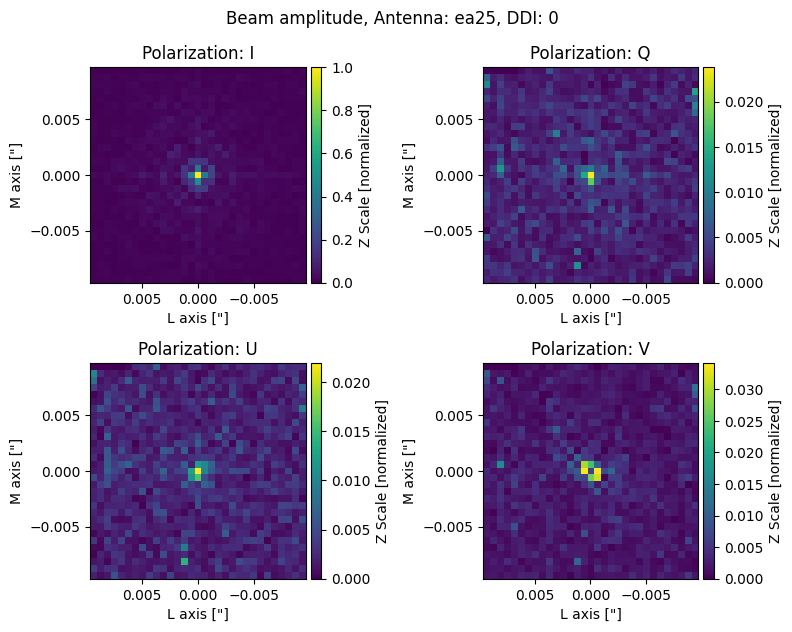

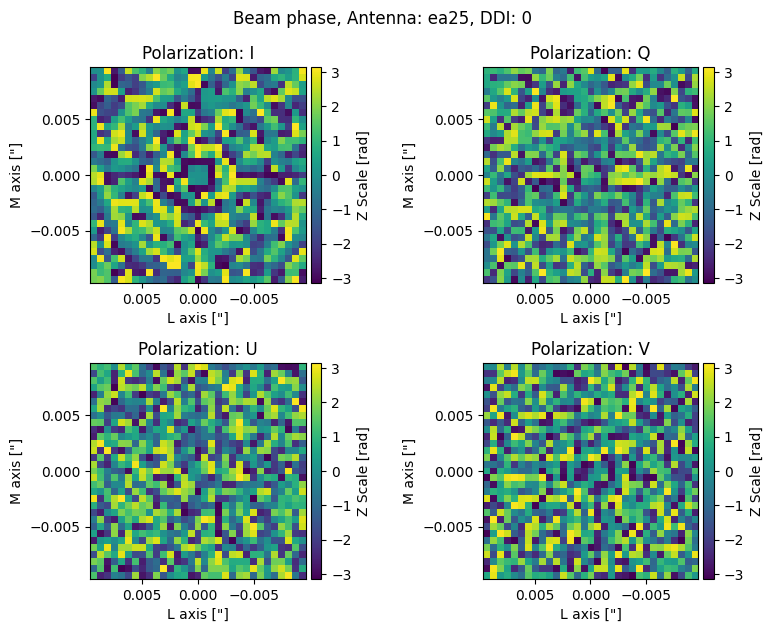

In [14]:
image_mds.plot_beams(image_exports,         # Directory to contain the plots
                     ant_id='ea25',         # Plotting antenna ea25
                     ddi=0,                 # Plotting DDI 0
                     display=True,          # Display plots below
                     complex_split='polar', # Plot amplitude and phase
                     parallel=False,        # Don't do plots in parallel
                    )

Here we call again `plot_beams`, this time over all the Antennas and the DDIs in the `image_mds`. For brevity the plots are not displayed, but a list of the files created is displayed just after the execution of `plot_beams`

In [15]:
image_mds.plot_beams(image_exports,         # Directory to contain the plots
                     ant_id=None,           # Plotting all antennae
                     ddi=None,              # Plotting all DDIs
                     display=False,         # Don't display plots below
                     complex_split='polar', # Plot amplitude and phase
                     parallel=True,         # Do plots in parallel
                    )
# All exported files
print()
print('Created files:')
list_directory_files(image_exports+'/image_beam*.png')

2023-07-21 13:51:19,935 - INFO     - astrohack - (_check_parms.py:135) - [plot_apertures]: Setting default ant to all.
2023-07-21 13:51:19,936 - INFO     - astrohack - (_check_parms.py:135) - [plot_apertures]: Setting default ddi to all.
2023-07-21 13:51:19,936 - WARNING  - astrohack - (_dio.py:236) - [plot_apertures]: Destination folder already exists, results may be overwritten

Created files:
image_exports/image_beam_amplitude_ant_ea25_ddi_1.png
image_exports/image_beam_phase_ant_ea06_ddi_0.png
image_exports/image_beam_phase_ant_ea25_ddi_1.png
image_exports/image_beam_amplitude_ant_ea25_ddi_0.png
image_exports/image_beam_phase_ant_ea06_ddi_1.png
image_exports/image_beam_phase_ant_ea25_ddi_0.png
image_exports/image_beam_amplitude_ant_ea06_ddi_1.png
image_exports/image_beam_amplitude_ant_ea06_ddi_0.png


### Plotting apertures

Apertures are the final product of `holog` and are the data that is used by `panel` to compute the screw adjustments. Before proceeding to `panel` we may want to inspect the amplitude and phase maps of the apertures.
Specifically the amplitude map may be used to estimate the value of the `cutoff` parameter of `panel`. In our first call to `plot_apertures` we are going to use a single antenna and DDI for display, followed by a call that goes over all antennas and DDIs and lists the created files.

2023-07-21 13:51:24,081 - WARNING  - astrohack - (_dio.py:236) - [plot_apertures]: Destination folder already exists, results may be overwritten


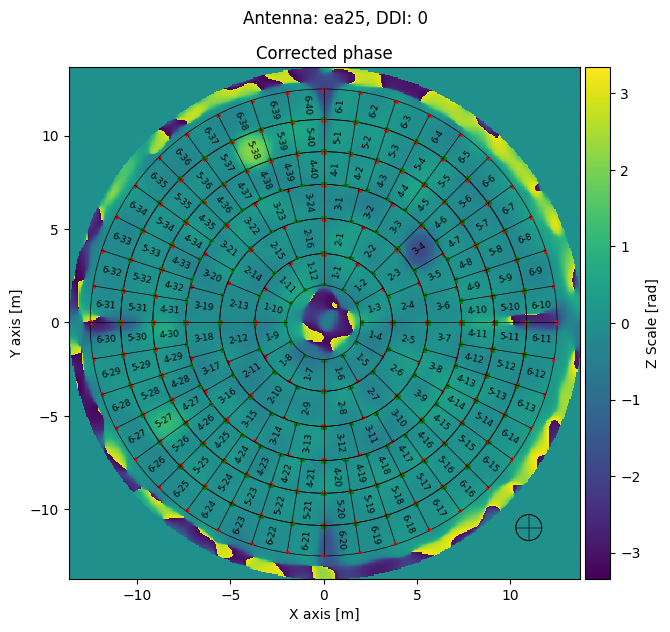

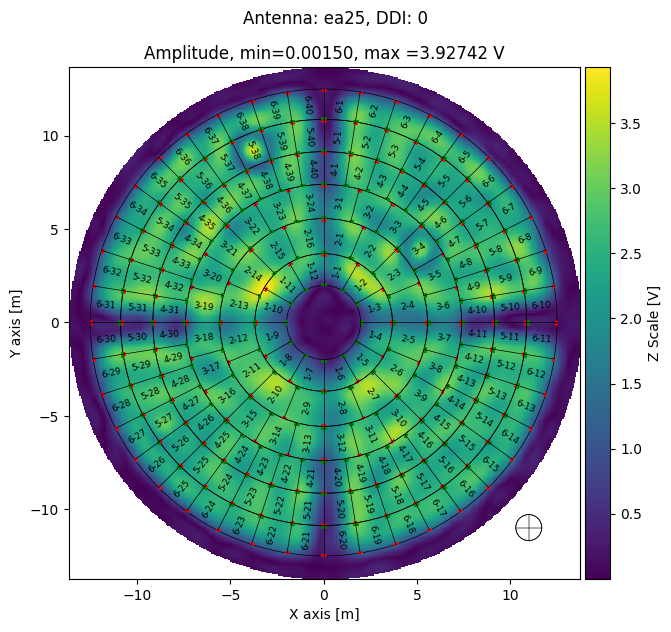

In [16]:
image_mds.plot_apertures(image_exports,       # Directory to contain the plots
                         ant_id='ea25',       # Plotting antenna ea25
                         ddi=0,               # Plotting DDI 0
                         plot_screws=True,    # Plotting screw positions
                         unit='rad',          # Plotting phase as radians, degrees also possible (deg)
                         display=True,        # Display plots below
                         parallel=False,      # Don't do plots in parallel
                         )

In [17]:
image_mds.plot_apertures(image_exports,       # Directory to contain the plots
                         ant_id=None,         # Plotting all antennae
                         ddi=None,            # Plotting all DDIs
                         plot_screws=True,    # Plotting screw positions
                         unit='deg',          # Plotting phase as degrees
                         display=False,       # Don't display plots below
                         parallel=True,       # Do plots in parallel
                         )
# List All exported files
print()
print('Created files:')
list_directory_files(image_exports+'/image_amplitude*.png')
list_directory_files(image_exports+'/image_corrected*.png')

2023-07-21 13:51:33,297 - INFO     - astrohack - (_check_parms.py:135) - [plot_apertures]: Setting default ant to all.
2023-07-21 13:51:33,298 - INFO     - astrohack - (_check_parms.py:135) - [plot_apertures]: Setting default ddi to all.
2023-07-21 13:51:33,299 - WARNING  - astrohack - (_dio.py:236) - [plot_apertures]: Destination folder already exists, results may be overwritten

Created files:
image_exports/image_amplitude_ant_ea25_ddi_0.png
image_exports/image_amplitude_ant_ea06_ddi_0.png
image_exports/image_amplitude_ant_ea25_ddi_1.png
image_exports/image_amplitude_ant_ea06_ddi_1.png
image_exports/image_corrected_phase_ant_ea06_ddi_1.png
image_exports/image_corrected_phase_ant_ea25_ddi_0.png
image_exports/image_corrected_phase_ant_ea06_ddi_0.png
image_exports/image_corrected_phase_ant_ea25_ddi_1.png


### Exporting image data to FITS

Sometimes it can be interesting to work with the data produced by `holog` in another astronomical software package such as `astropy` or `carta`. For this purpose we have introduced the method `export_to_fits` to the `image_mds` object. The FITS created by this routine encompass all the data arrays contained in each `xarray` dataset of the `image_mds`. After the execution of `export_to_fits` we display the list of created files and the header of one of the created files.

In [18]:
image_mds.export_to_fits(image_exports,             # Directory to contain FITS files
                         complex_split='cartesian', # Data will be split into real and imaginary FITS files
                         ant_id=None,               # Export all antennae
                         ddi=None,                  # Export all DDIs
                         parallel=True)             # Export FITS files in parallel

# All exported files
print()
print('Created files:')
list_directory_files(image_exports+'/image*.fits')

2023-07-21 13:51:47,576 - INFO     - astrohack - (_check_parms.py:135) - [export_to_fits]: Setting default ant to all.
2023-07-21 13:51:47,577 - INFO     - astrohack - (_check_parms.py:135) - [export_to_fits]: Setting default ddi to all.
2023-07-21 13:51:47,577 - WARNING  - astrohack - (_dio.py:236) - [export_to_fits]: Destination folder already exists, results may be overwritten

Created files:
image_exports/image_beam_real_ant_ea25_ddi_1.fits
image_exports/image_aperture_imag_ant_ea25_ddi_1.fits
image_exports/image_aperture_real_ant_ea06_ddi_0.fits
image_exports/image_amplitude_ant_ea06_ddi_1.fits
image_exports/image_aperture_real_ant_ea25_ddi_0.fits
image_exports/image_amplitude_ant_ea25_ddi_1.fits
image_exports/image_beam_imag_ant_ea06_ddi_1.fits
image_exports/image_beam_real_ant_ea06_ddi_0.fits
image_exports/image_aperture_imag_ant_ea25_ddi_0.fits
image_exports/image_corrected_phase_ant_ea06_ddi_0.fits
image_exports/image_beam_imag_ant_ea25_ddi_0.fits
image_exports/image_amplitude

In [19]:
# Antenna ea06 DDI 0 aperture amplitude FITS header
from astropy.io import fits
hdul = fits.open(image_exports+'/image_amplitude_ant_ea06_ddi_0.fits')
print(repr(hdul[0].header))

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                  442                                                  
NAXIS2  =                  442                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    4                                                  
EXTEND  =                    T                                                  
STOKES  = 'I, Q, U, V'                                                          
WAVELENG=  0.02116132265123173                                                  
FREQUENC=        14167000000.0                                                  
TELESCOP= 'ea06    '                                                            
INSTRUME= 'VLA     '        

## Panel: screw adjustments, plotting residuals corrections and exporting data to FITS

If we are sure about the quality of the data we can now proceed to getting screw adjustments and evaluating the surface provided by these adjustments. For that we are going to use the methods of the `panel_mds` object, i.e. the data product of the `panel` function.

### Run panel or open panel file

Here we check for the existence of a `.panel.zarr` file, if it does not exist we run `panel`, if it exists we open it with `open_panel`.

In [20]:
import os
from astrohack import panel, open_panel

panel_file = 'data/ea25_cal_small_after_fixed.split.panel.zarr'

if os.path.exists(panel_file):
    panel_mds = open_panel(panel_file)
else:
    panel_mds = panel(image_name=image_file,
                      panel_model='rigid',
                      overwrite=True,
                      parallel=True
                     )


2023-07-21 13:51:48,619 - INFO     - astrohack - (_check_parms.py:135) - [panel]: Setting default panel_name to data/ea25_cal_small_after_fixed.split.panel.zarr.
2023-07-21 13:51:48,620 - INFO     - astrohack - (_check_parms.py:135) - [panel]: Setting default ant to all.
2023-07-21 13:51:48,620 - INFO     - astrohack - (_check_parms.py:135) - [panel]: Setting default ddi to all.
2023-07-21 13:51:52,053 - INFO     - astrohack - (panel.py:111) - [panel]: Finished processing


With the `panel_mds` in hands we can now explore its contents. As before we define a variable, this time called `panel_exports`, with the name of the directory to contain the exported products and we call the `summary` method to see the list of contents and available methods. In this tutorial we will cover the methods: `plot_antennae`, `export_screws` and `export_to_fits`.

In [21]:
panel_exports = 'panel_exports'
panel_mds.summary()

####################################################################################################
###                                         Summary for:                                         ###
###                       data/ea25_cal_small_after_fixed.split.panel.zarr                       ###
####################################################################################################

Attributes:
+---------------+--------------------------------------------------+
| Attribute     | Value                                            |
+---------------+--------------------------------------------------+
| image_name    | data/ea25_cal_small_after_fixed.split.image.zarr |
| panel_name    | data/ea25_cal_small_after_fixed.split.panel.zarr |
| cutoff        | 0.2                                              |
| panel_kind    | rigid                                            |
| panel_margins | 0.2                                              |
| parallel      | True         

### Plotting antenna original deviation, residuals and corrections

Here we make a first call to `plot_antennae` to plot only the deviations for a single antenna and DDI for brevity, and then a second call to produce all possible plots for all the antennas and DDIs present in the `panel_mds`.
The deviation plots shown below serve to ilustrate the current state of the antenna surface, the proposed corrections to it, and the estimated residuals after the correction is applied to the antenna.

2023-07-21 13:51:52,114 - INFO     - astrohack - (_check_parms.py:135) - [plot_antennae]: Setting default unit to mm.


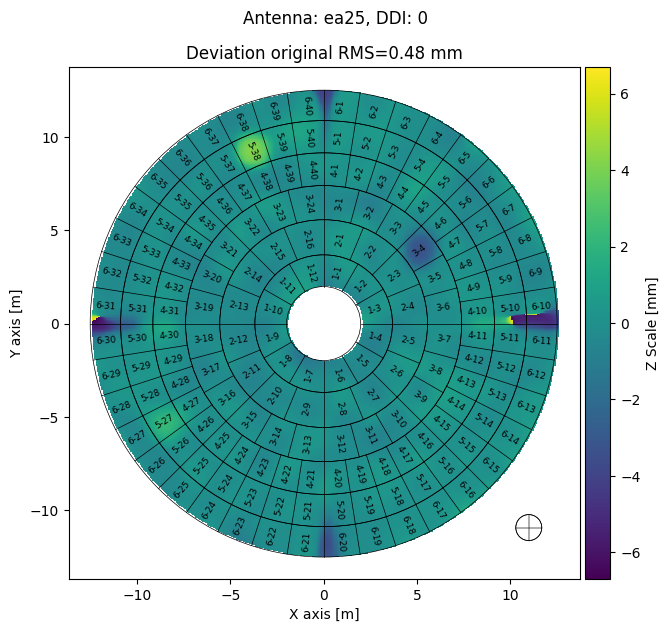

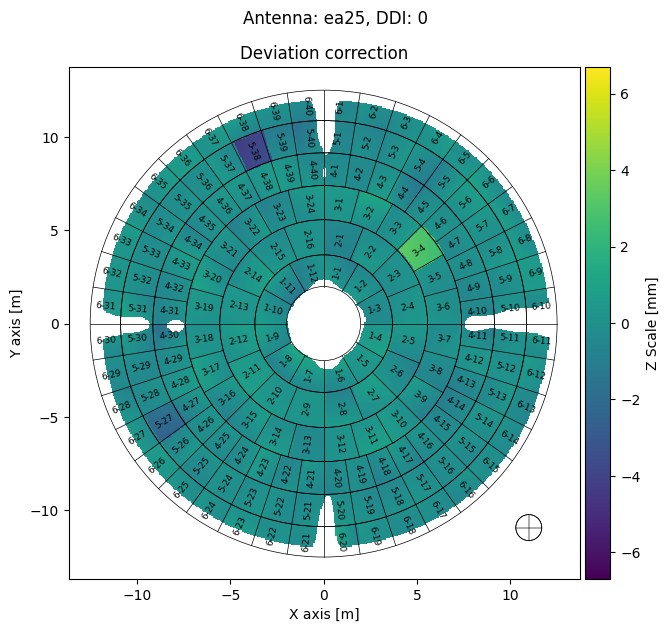

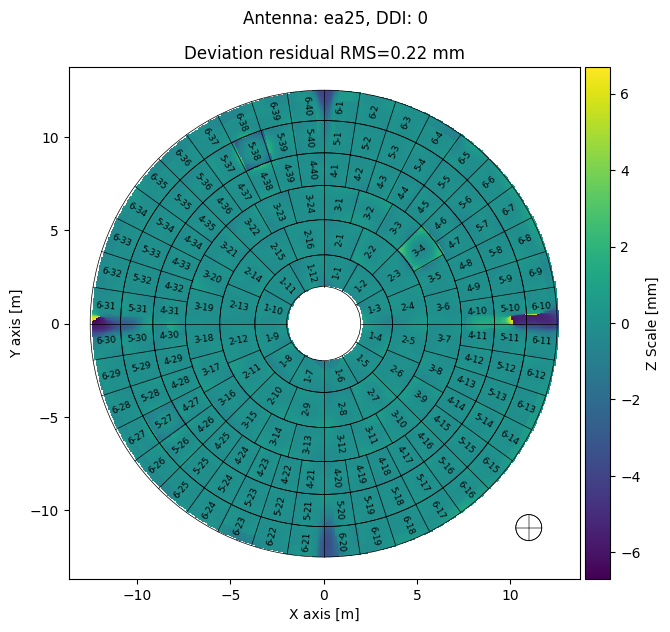

In [22]:
panel_mds.plot_antennae(panel_exports,           # Directory to contain the plot and text file
                        ant_id='ea25',           # Plotting Antenna ea25
                        ddi=0,                   # Plotting DDI 0
                        plot_type='deviation',   # Do deviation plots only
                        plot_screws=False,       # Not plotting screw positions
                        parallel=False,          # Don't do plots in parallel
                        display=True             # Display plots below
                       )

In [23]:
panel_mds.plot_antennae(panel_exports,           # Directory to contain the plot and text file
                        ant_id=None,             # Plotting all Antennae
                        ddi=None,                # Plotting all DDIs
                        plot_type='all',         # Do all possible plots
                        plot_screws=False,       # Not plotting screw positions
                        parallel=True,           # Do plots in parallel
                        display=False            # Don't Display plots below
                       )

# All exported files
print()
print('Created files:')
list_directory_files(panel_exports+'/panel_mask*.png')
list_directory_files(panel_exports+'/panel_amplitude*.png')
list_directory_files(panel_exports+'/panel_deviation*.png')
list_directory_files(panel_exports+'/panel_phase*.png')


2023-07-21 13:51:56,009 - INFO     - astrohack - (_check_parms.py:135) - [plot_antennae]: Setting default ant to all.
2023-07-21 13:51:56,010 - INFO     - astrohack - (_check_parms.py:135) - [plot_antennae]: Setting default ddi to all.
2023-07-21 13:51:56,010 - INFO     - astrohack - (_check_parms.py:135) - [plot_antennae]: Setting default unit to mm.
2023-07-21 13:51:56,010 - INFO     - astrohack - (mds.py:760) - [plot_antennae]: Unit for phase plots set to degrees
2023-07-21 13:51:56,011 - WARNING  - astrohack - (_dio.py:236) - [plot_antennae]: Destination folder already exists, results may be overwritten

Created files:
panel_exports/panel_mask_ant_ea06_ddi_1.png
panel_exports/panel_mask_ant_ea25_ddi_1.png
panel_exports/panel_mask_ant_ea25_ddi_0.png
panel_exports/panel_mask_ant_ea06_ddi_0.png
panel_exports/panel_amplitude_ant_ea06_ddi_0.png
panel_exports/panel_amplitude_ant_ea25_ddi_1.png
panel_exports/panel_amplitude_ant_ea06_ddi_1.png
panel_exports/panel_amplitude_ant_ea25_ddi_0.p

### Screw adjustments

If we are satisfied with the proposed corrections we can then export them as a `txt` file and an acompaining helper plot. This can be done with the `panel_mds` method `export_screws`. Here we cover a single antenna and DDI for brevity.

2023-07-21 13:52:12,234 - WARNING  - astrohack - (_dio.py:236) - [export_screws]: Destination folder already exists, results may be overwritten


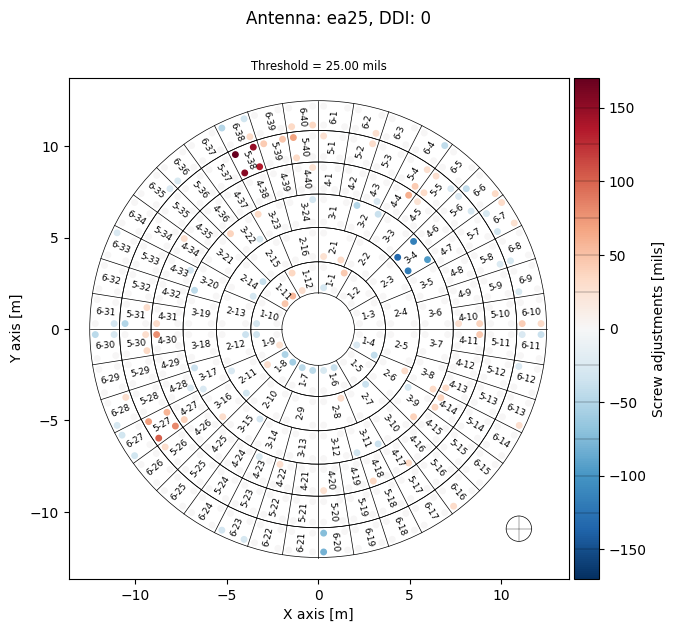

In [24]:
panel_mds.export_screws(panel_exports,            # Directory to contain the plot and text file
                        unit='mils',              # Unit to express screw adjustments in plots and texts
                        threshold= 25,            # Threshold in mils for significant adjustments
                        display=True,             # Display plot below
                        ant_id='ea25',            # Export screw adjustments for antenna ea25
                        ddi=0                     # Export screw adjustments for ddi 0
                       )

Below we show an example of a `txt` file produced by `export_screws`

In [25]:
with open(panel_exports+'/panel_screws_ant_ea25_ddi_0.txt', 'r') as file:
    for _ in range(30):
        print(file.readline()[:-1])

# Screw adjustments for VLA ea25 antenna
# Adjustments are in mils

# Lower means away from subreflector
# Raise means toward the subreflector
# LOWER the panel if the number is POSITIVE
# RAISE the panel if the number is NEGATIVE


Panel           il         ir         ol         or         
1-1          -29.85      -5.25      -1.46      44.54
1-2          -15.11     -21.04      18.10       7.02
1-3           13.42      18.76       1.81      11.80
1-4          -10.19     -26.44     -10.86     -41.23
1-5          -17.62     -11.82     -17.76      -6.90
1-6          -39.25     -27.37       0.31      22.52
1-7          -44.24     -45.22      11.13       9.30
1-8          -58.86     -52.70      17.27      28.79
1-9           26.36       6.36       1.68     -35.72
1-10           5.66      24.91     -29.61       6.39
1-11          47.52      56.63     -19.14      -2.11
1-12          28.28       0.09      35.35     -17.36
2-1           25.96      31.18      12.84      20.74
2-2          -13.

### Exporting panel data to FITS

As with the `image_mds` data it may be convenient to export the data arrays in a `panel_mds` to FITS files.
This can be acomplished with the method `export_to_fits`. As before we export all the data in the `panel_mds`, display a list of the produced files and an example header of one of the created files.

In [26]:
panel_mds.export_to_fits(panel_exports,             # Directory to contain FITS files
                         ant_id=None,               # Export all antennae
                         ddi=None,                  # Export all DDIs
                         parallel=True)             # Export FITS files in parallel

# All exported files
print()
print('Created files:')
list_directory_files(panel_exports+'/panel*.fits')

2023-07-21 13:52:14,275 - INFO     - astrohack - (_check_parms.py:135) - [export_to_fits]: Setting default ant to all.
2023-07-21 13:52:14,276 - INFO     - astrohack - (_check_parms.py:135) - [export_to_fits]: Setting default ddi to all.
2023-07-21 13:52:14,276 - WARNING  - astrohack - (_dio.py:236) - [export_to_fits]: Destination folder already exists, results may be overwritten

Created files:
panel_exports/panel_phase_original_ant_ea06_ddi_1.fits
panel_exports/panel_amplitude_ant_ea25_ddi_1.fits
panel_exports/panel_phase_residual_ant_ea25_ddi_1.fits
panel_exports/panel_deviation_correction_ant_ea25_ddi_0.fits
panel_exports/panel_phase_correction_ant_ea06_ddi_1.fits
panel_exports/panel_amplitude_ant_ea25_ddi_0.fits
panel_exports/panel_mask_ant_ea06_ddi_1.fits
panel_exports/panel_deviation_correction_ant_ea06_ddi_1.fits
panel_exports/panel_deviation_correction_ant_ea06_ddi_0.fits
panel_exports/panel_deviation_correction_ant_ea25_ddi_1.fits
panel_exports/panel_amplitude_ant_ea06_ddi_0.

In [27]:
# Antenna ea06 DDI 0 deviation residual FITS header
from astropy.io import fits

hdul = fits.open(panel_exports+'/panel_deviation_residual_ant_ea06_ddi_0.fits')
print(repr(hdul[0].header))

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  442                                                  
NAXIS2  =                  442                                                  
EXTEND  =                    T                                                  
PMODEL  = 'rigid   '                                                            
PMARGIN =                  0.2                                                  
CUTOFF  =   0.8942142937724334                                                  
TELESCOP= 'ea06    '                                                            
INSTRUME= 'VLA     '                                                            
WAVELENG=  0.02116132265123173                                                  
FREQUENC=        14167000000